### Extended Analysis: ADHD and Bipolar Disorder Identification  - by Yating Jing

In [1]:
import pandas as pd
import numpy as np

df_adhd = pd.read_csv('ADHD_rCBF.csv')
df_bipolar = pd.read_csv('Bipolar_rCBF.csv')

In [2]:
from __future__ import division

df_all = pd.concat([df_adhd, df_bipolar], axis=0)
chance =  df_adhd.shape[0] / df_all.shape[0]
print 'Chance is %0.4f' % chance

X_all = df_all.values
y = [0] * df_adhd.shape[0] + [1] * df_bipolar.shape[0]

print 'Double check data size:', X_all.shape, len(y)

Chance is 0.7591
Double check data size: (1955, 260) 1955


### PCA

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Plot explained variance ratio
def plot(ex_var_ratio):
    plt.plot(ex_var_ratio)
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Number of Principal Components')

def pca(X, n):
    X_scaled = preprocessing.scale(X)
    pca = PCA(n_components=n)
    pc = pca.fit_transform(X_scaled)
    
    print '\nExplained Variance Ratios:'
    print pca.explained_variance_ratio_
    print '\nSum of Explained Variance Ratios:', 
    print np.sum(pca.explained_variance_ratio_)

    return pc, pca.explained_variance_ratio_


Explained Variance Ratios:
[ 0.61952462  0.09113315  0.08372461  0.0242757   0.01855307  0.0162609
  0.01066687  0.01017312  0.00834067  0.00676367  0.00622076  0.00577653
  0.00451711  0.00425227  0.00390682  0.003756    0.0036283   0.00322271
  0.00313953  0.00298522]

Sum of Explained Variance Ratios: 0.930821646393


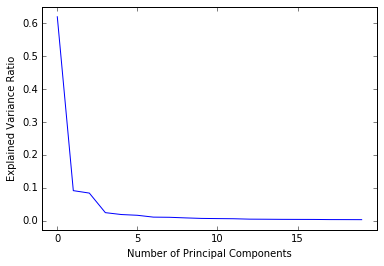

In [4]:
X_pca, ex_var_ratio = pca(X_all, 20)
plot(ex_var_ratio)

### LLE

In [5]:
from sklearn.manifold import LocallyLinearEmbedding
from mpl_toolkits.mplot3d import Axes3D

# Compute explained variance ratio of transformed data
def compute_explained_variance_ratio(transformed_data):
    explained_variance = np.var(transformed_data, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    explained_variance_ratio = np.sort(explained_variance_ratio)[::-1]
    return explained_variance_ratio

def lle(X, n=10):
    X_scaled = preprocessing.scale(X)
    lle = LocallyLinearEmbedding(n_neighbors=10, n_components=n, method='ltsa')
    pc = lle.fit_transform(X_scaled)
    ex_var_ratio = compute_explained_variance_ratio(pc)
    
    print '\nExplained Variance Ratios:'
    print ex_var_ratio
    print '\nSum of Explained Variance Ratios:', 
    print np.sum(ex_var_ratio)
    
    return pc, ex_var_ratio
    
X_lle, ex_var_ratio = lle(X_all, 10) 


Explained Variance Ratios:
[ 0.10136208  0.10116825  0.10108163  0.10100275  0.10099331  0.09970612
  0.09956548  0.0994801   0.09869764  0.09694265]

Sum of Explained Variance Ratios: 1.0


In [6]:
from sklearn import cross_validation
from sklearn.cross_validation import KFold

# Train the given classifier
def train_clf(clf, train_feats, train_labels):
    # Supervised training
    clf.fit(train_feats, train_labels)
    
# Test the given classifier and calculate accuracy
def test_clf(clf, test_feats, test_labels):
    # Predict using test set
    predicted = clf.predict(test_feats)
    # Compute accuracy
    acc = np.mean(predicted == test_labels)
    return predicted, acc

# Compute accuracy of a model trained with a specific number(n) of samples 
def compute_acc(clf, n):
    train_clf(clf, train_X[:n], train_y[:n])
    predict_y, acc = test_clf(clf, test_X, test_y)
    return acc

# Leave one out cross validation
def loo_cv(clf, X, y):
    loo = LeaveOneOut(len(X))
    scores = cross_validation.cross_val_score(clf, X, y, cv=loo)
    return scores.mean(), scores.std()

# K-fold cross validation
def kf_cv(clf, X, y, k=10):
    kf = KFold(len(X), n_folds=k)
    scores = cross_validation.cross_val_score(clf, X, y, cv=kf)
    return scores.mean(), scores.std()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

X = X_lle

# Logistic Regression
lg = LogisticRegression(penalty='l2')
acc_lg, acc_std_lg = kf_cv(lg, X, y)
print 'Logistic Regression accuracy is %0.4f (+/- %0.3f)' % (acc_lg, acc_std_lg)

# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=7)
acc_knn, acc_std_knn = kf_cv(knn, X, y)
print 'K Nearest Neighbors accuracy is %0.4f (+/- %0.3f)' % (acc_knn, acc_std_knn)

# Support Vector Machine - Linear Kernel
svc = LinearSVC()
acc_svm, acc_std_svm = kf_cv(svc, X, y)
print 'Support Vector Machine (Linear Kernel) accuracy is %0.4f (+/- %0.3f)' % (acc_svm, acc_std_svm)

# Linear Discriminant Analysis
lda = LDA()
acc_lda, acc_std_lda = kf_cv(lda, X, y)
print 'Linear Discriminant Analysis accuracy is %0.4f (+/- %0.3f)' % (acc_lda, acc_std_lda)

# Quadratic Discriminant Analysis
qda = QDA()
acc_qda, acc_std_qda = kf_cv(qda, X, y)
print 'Quadratic Discriminant Analysis accuracy is %0.4f (+/- %0.3f)' % (acc_qda, acc_std_qda)

# Random Forest
rf = RandomForestClassifier(n_estimators=30) 
acc_rf, acc_std_rf = kf_cv(rf, X, y) 
print 'Random Forest accuracy is %0.4f (+/- %0.3f)' % (acc_rf, acc_std_rf)

# Gradient Boosting 
gb = GradientBoostingClassifier(n_estimators=20, max_depth=3)
acc_gb, acc_std_gb = kf_cv(gb, X, y)
print 'Gradient Boosting accuracy is %0.4f (+/- %0.3f)' % (acc_gb, acc_std_gb)

# Extra Trees  
et = ExtraTreesClassifier(n_estimators=40, max_depth=5)
acc_et, acc_std_et = kf_cv(et, X, y)
print 'Extra Trees accuracy is %0.4f (+/- %0.3f)' % (acc_et, acc_std_et)

# AdaBoost
ada = AdaBoostClassifier()
acc_ada, acc_std_ada = kf_cv(ada, X, y)
print 'AdaBoost accuracy is %0.4f (+/- %0.3f)' % (acc_ada, acc_std_ada)

Logistic Regression accuracy is 0.7585 (+/- 0.399)
K Nearest Neighbors accuracy is 0.6941 (+/- 0.345)
Support Vector Machine (Linear Kernel) accuracy is 0.7585 (+/- 0.399)
Linear Discriminant Analysis accuracy is 0.7513 (+/- 0.391)
Quadratic Discriminant Analysis accuracy is 0.6599 (+/- 0.241)
Random Forest accuracy is 0.7130 (+/- 0.357)
Gradient Boosting accuracy is 0.7534 (+/- 0.395)
Extra Trees accuracy is 0.7580 (+/- 0.398)
AdaBoost accuracy is 0.7431 (+/- 0.381)
